# Project: Patient Not Showing Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### I will be investigating a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, I wil try to explore the data and answer a number of questions.

Q1 - Can we predict by gender if a patient is likely to not show ?

Q2 - Is there a correlation between age and a patient not showing ?

Q3 - Does sending patients an SMS reminder have any impact on patient showing ?

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [226]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [228]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis = 1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


### I decided to drop the colums that will not impact the analysis in the cell above.

In [229]:
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace=True)
df.rename(columns={'No-show':'No_show'},inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender          110527 non-null object
Age             110527 non-null int64
Scholarship     110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
SMS_received    110527 non-null int64
No_show         110527 non-null int64
dtypes: int64(8), object(1)
memory usage: 7.6+ MB


### No-show column data type was object(String) I converted it to int64 so that I can use it as a boolean ( 0 = False, 1 = True ), also changed it's name to No_show to make it easier for me.

In [230]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [231]:
df.query('Age < 0')

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,0,0,0,0,0,0,0


In [232]:
df.drop(99832,inplace= True)

### As you can see in the table above the Age min is -1 and that is not possible so I droped it.

<a id='eda'></a>
## Exploratory Data Analysis



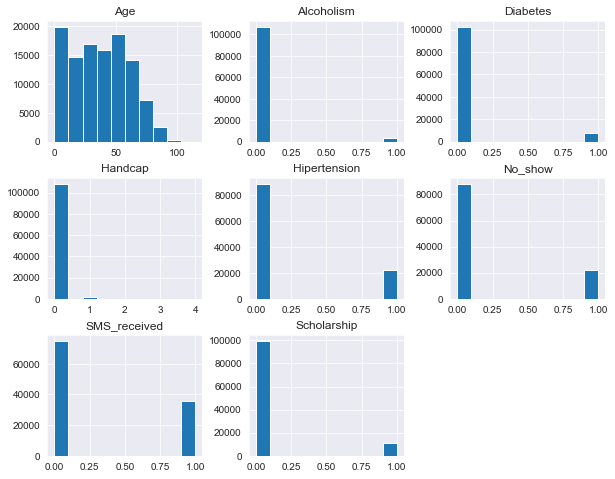

In [233]:
df.hist(figsize=(10,8));

## Q1
> ### Can we predict by gender if a patient is likely to not show ?

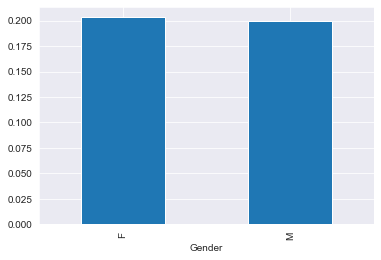

In [234]:
df.groupby('Gender').No_show.mean().plot(kind='bar');

## Q2
> ### Is there a correlation between age and a patient not showing ? 

In [235]:
didnt_show = df.No_show == True
showed = df.No_show == False

In [236]:
df.Age[didnt_show].mean()

34.31766656212196

In [237]:
df.Age[showed].mean()

37.790504154999034

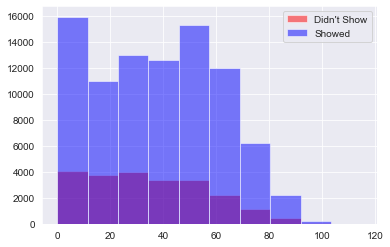

In [238]:
df.Age[didnt_show].hist(alpha=0.5,label="Didn't Show",color='red')
df.Age[showed].hist(alpha=0.5,label="Showed",color='blue')
plt.legend();

## Q3
> ### Does sending patients an SMS reminder have any impact on patient showing ? 

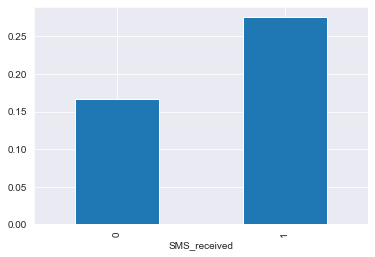

In [239]:
df.groupby('SMS_received').No_show.mean().plot(kind='bar');

<a id='conclusions'></a>
## Conclusions


## after analyzing the dataset I have come to these results and answers to my questions
> ### The first Q "Can we predict by gender if a patient is likely to not show up ?" the resluts was that males and females have a similar percentage of not showing up so we can't predict by gender.
> ### The second Q "Is there a correlation between age and a patient not showing up ?" based on the plot we can say that there isn't any correlation between age and patient not showing up.
> ### The third Q "Does sending patients an SMS reminder have any impact on patient showing up ? " by the bar plot we can see that patients who received SMS have a higher chance of not showing compared to those who didn't receive SMS.